### Noise Data Final Cleaning - This code produced final_noise_data.csv

In [142]:
import pandas as pd
import numpy as np

In [51]:
df_noise = pd.read_csv('EDA_weather/data/final_noise_data.csv')

In [ ]:
# sort the df by description and date
df_noise = df_noise.sort_values(by=['description', 'result_timestamp'])

In [58]:
df_noise.head()

,location,year,month,day_month,day_week,10_min_interval_start_time,lamax,laeq,lceq,lcpeak
0,Naamsestraat 35,2022,2,28,Monday,08:20,61.254569,59.892893,70.729188,82.077462
1,Naamsestraat 35,2022,2,28,Monday,08:30,56.527000,54.629000,65.911750,77.521717
2,Naamsestraat 35,2022,2,28,Monday,08:40,59.563057,57.756369,65.896815,77.866975
3,Naamsestraat 35,2022,2,28,Monday,08:50,NaN,NaN,NaN,NaN
4,Naamsestraat 35,2022,2,28,Monday,09:00,NaN,NaN,NaN,NaN


In [74]:
# number of times where the noise level is above 80 dB
df_noise[df_noise['lcpeak'] > 80].shape[0]/df_noise.shape[0]

0.04918203017914043

/var/folders/2m/7gvhhs715ydgyx00ps4pqjbc0000gn/T/ipykernel_32735/389927154.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_noise['lamax'], bins=100, kde=False)


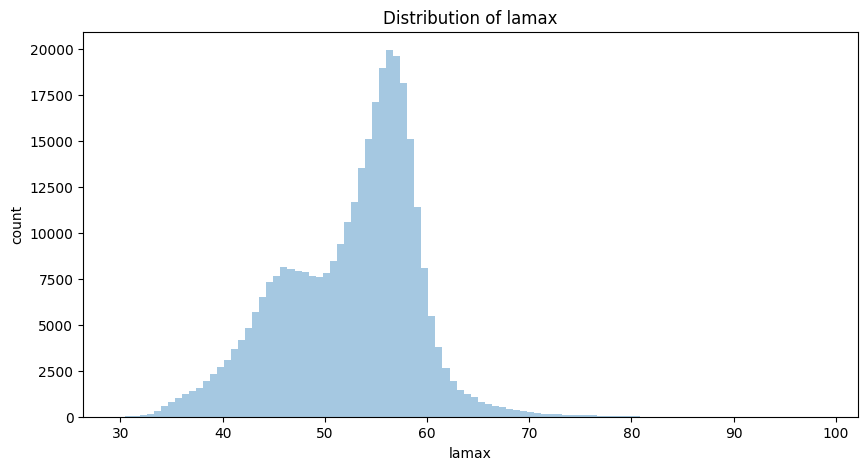

/var/folders/2m/7gvhhs715ydgyx00ps4pqjbc0000gn/T/ipykernel_32735/389927154.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_noise['laeq'], bins=100, kde=False)


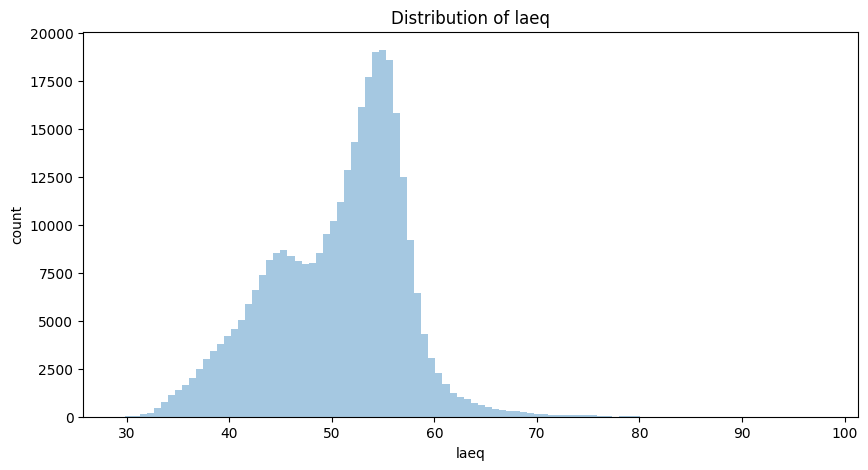

/var/folders/2m/7gvhhs715ydgyx00ps4pqjbc0000gn/T/ipykernel_32735/389927154.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_noise['lceq'], bins=100, kde=False)


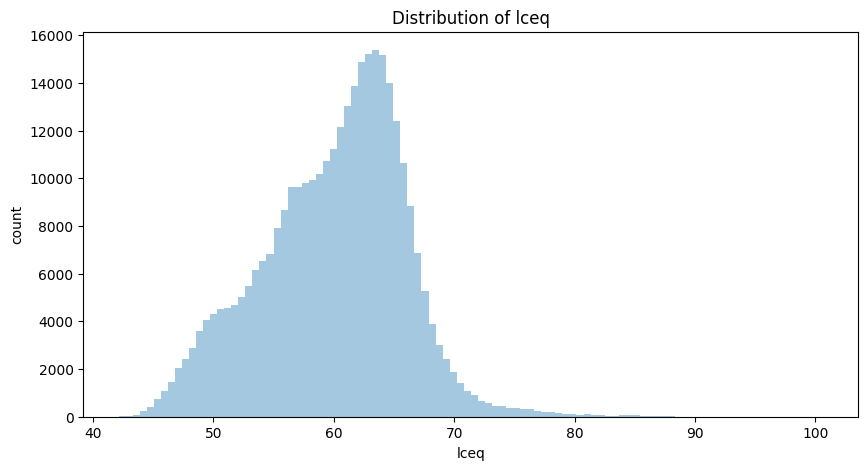

/var/folders/2m/7gvhhs715ydgyx00ps4pqjbc0000gn/T/ipykernel_32735/389927154.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_noise['lcpeak'], bins=100, kde=False)


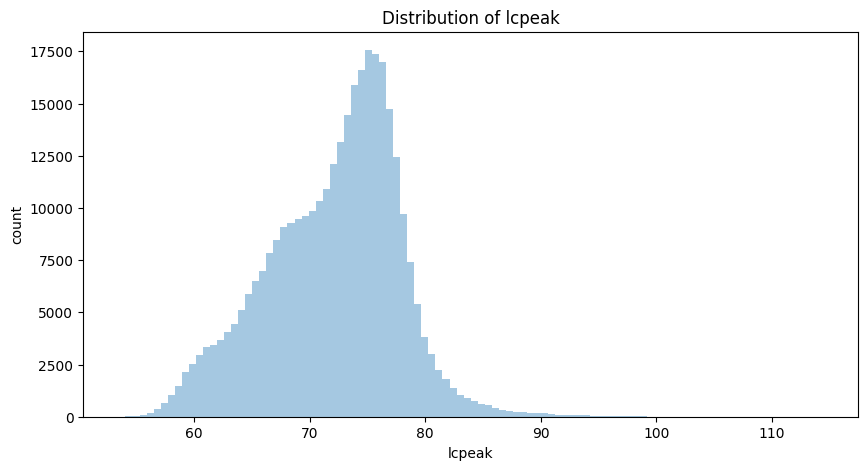

In [64]:
# plot the detailed dstrbuton of lamax,laeq,lceq and lcpeak using pyplot
import matplotlib.pyplot as plt
import seaborn as sns

# plot the distribution of lamax
plt.figure(figsize=(10, 5))
sns.distplot(df_noise['lamax'], bins=100, kde=False)
plt.title('Distribution of lamax')
plt.xlabel('lamax')
plt.ylabel('count')
plt.show()

# plot the distribution of laeq
plt.figure(figsize=(10, 5))
sns.distplot(df_noise['laeq'], bins=100, kde=False)
plt.title('Distribution of laeq')
plt.xlabel('laeq')
plt.ylabel('count')
plt.show()

# plot the distribution of lceq
plt.figure(figsize=(10, 5))
sns.distplot(df_noise['lceq'], bins=100, kde=False)
plt.title('Distribution of lceq')
plt.xlabel('lceq')
plt.ylabel('count')
plt.show()

# plot the distribution of lcpeak
plt.figure(figsize=(10, 5))
sns.distplot(df_noise['lcpeak'], bins=100, kde=False)
plt.title('Distribution of lcpeak')
plt.xlabel('lcpeak')
plt.ylabel('count')
plt.show()

In [57]:
# what are the values of the description column?
print(df_noise['location'].unique())
# change these values to : Naamsestraat 35,Naamsestraat 57,Naamsestraat 62,His & Hears,Calvariekapel,Parkstraat 2,Naamsestraat 81,Vrijthof
df_noise['location'] = df_noise['location'].replace(['MP 01: Naamsestraat 35  Maxim','MP 02: Naamsestraat 57 Xior','MP 03: Naamsestraat 62 Taste','MP 04: His & Hears','MP 05: Calvariekapel KU Leuven','MP 06: Parkstraat 2 La Filosovia','MP 07: Naamsestraat 81','MP08bis - Vrijthof'],['Naamsestraat 35','Naamsestraat 57','Naamsestraat 62','His & Hears','Calvariekapel','Parkstraat 2','Naamsestraat 81','Vrijthof'])

['MP 01: Naamsestraat 35  Maxim' 'MP 02: Naamsestraat 57 Xior'
 'MP 03: Naamsestraat 62 Taste' 'MP 04: His & Hears'
 'MP 05: Calvariekapel KU Leuven' 'MP 06: Parkstraat 2 La Filosovia'
 'MP 07: Naamsestraat 81' 'MP08bis - Vrijthof']


In [44]:
# drop the month column
df_noise.drop(columns=['month'], inplace=True)
# change description column to location
df_noise.rename(columns={'description': 'location'}, inplace=True)
# create new column Month with the month number
df_noise['month'] = df_noise['result_timestamp'].str[5:7]
# create new column Year with the year
df_noise['year'] = df_noise['result_timestamp'].str[:4]
# create new column Day with the day
df_noise['day_month'] = df_noise['result_timestamp'].str[8:10]
# create new column Time with the time
df_noise['10_min_interval_start_time'] = df_noise['result_timestamp'].str[11:16]
# create new column day_of_week with the day of the week
df_noise['day_week'] = pd.to_datetime(df_noise['result_timestamp']).dt.day_name()
# drop result_timestamp column
df_noise.drop(columns=['result_timestamp'], inplace=True)
# put the columns in the following order: location, year, month, day_month, day_week, time, lamax, laeq, lceq, lcpeak
df_noise = df_noise[['location', 'year', 'month', 'day_month', 'day_week', '10_min_interval_start_time', 'lamax', 'laeq', 'lceq', 'lcpeak']]
# drop the lamax and laeq columns
df_noise.drop(columns=['lamax', 'laeq'], inplace=True)
# rename the lceq and lcpeak columns to lceq_avg and lcpeak_avg
df_noise.rename(columns={'lceq': 'lceq_avg', 'lcpeak': 'lcpeak_avg'}, inplace=True)

In [45]:
# what dataype is each column
df_noise.dtypes
# convert the following columns to numeric: year, month, day_month
df_noise['year'] = pd.to_numeric(df_noise['year'])
df_noise['month'] = pd.to_numeric(df_noise['month'])
df_noise['day_month'] = pd.to_numeric(df_noise['day_month'])

In [76]:
# save the df as a csv file
df_noise.to_csv('EDA_weather/data/final_noise_data.csv', index=False)

### Weather Data locations map + Final Cleaning

In [123]:
df_weather=pd.read_csv('EDA_weather/data/weather_data/Weather_cleaned.csv')

In [124]:
df_weather.head()

,DATEUTC,ID,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP
0,2022-01-01 00:10:00,2,92,11.78,38,0,0.0,0.0,-169.0,0.43,0.0,13.048027
1,2022-01-01 00:20:00,2,92,11.73,37,0,0.0,0.0,-170.0,0.33,0.0,12.985849
2,2022-01-01 00:30:00,2,92,11.73,38,0,0.0,0.0,-167.0,0.46,0.0,12.950322
3,2022-01-01 00:40:00,2,92,11.72,37,0,0.0,0.0,-160.0,0.52,0.0,12.949550
4,2022-01-01 00:50:00,2,92,11.72,38,0,0.0,0.0,-166.0,0.51,0.0,12.952268


In [42]:
df_meta = pd.read_csv('EDA_weather/data/weather_data/01_Metadata_v2.csv')

In [43]:
df_meta.head()

,ID,LAT,LON,ALT,Local_climate_zone,Landcover,building_height,Sky_view_factor,installation_height
0,LC-002,50.847,4.756,47,9,1,4.280000,0.610367,2
1,LC-003,50.870,4.728,44,5,1,5.038286,0.691315,2
2,LC-004,50.871,4.685,31,9,1,9.050964,0.798586,2
3,LC-005,50.881,4.713,26,2,1,5.050000,0.685410,2
4,LC-006,50.912,4.716,13,6,1,0.000000,0.954032,2


In [47]:
# show a map of the stations the cordinates are in the df_meta file
import folium
from folium.plugins import MarkerCluster

# create map saating in Leuven, Belgium
m = folium.Map(location=[50.8798, 4.7005], zoom_start=10)
# add marker for every station
for i in range(0,len(df_meta)):
    folium.Marker(
        location=[df_meta.iloc[i]['LAT'], df_meta.iloc[i]['LON']],
        popup=df_meta.iloc[i]['ID'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

In [48]:
noise_sensors=['Naamsestraat 35, 3000 Leuven','Naamsestraat 57, 3000 Leuven','Naamsestraat 62, 3000 Leuven','Naamsestraat 76, 3000 Leuven','Naamsestraat 81, 3000 Leuven','Naamsestraat 80, 3000 Leuven','Parkstraat 1, 3000 Leuven']

In [49]:
# use geopy to make a list of coordinates for the adesses in the list noise_sensors
import geopy
from geopy.geocoders import Nominatim
geopy.geocoders.options.default_user_agent = "my-application"
geolocator = Nominatim(user_agent="http")
coordinates=[]
for i in range(0,len(noise_sensors)):
    print(noise_sensors[i])
    location = geolocator.geocode(noise_sensors[i])
    coordinates.append((location.latitude, location.longitude))
print(coordinates)


Naamsestraat 35, 3000 Leuven
Naamsestraat 57, 3000 Leuven
Naamsestraat 62, 3000 Leuven
Naamsestraat 76, 3000 Leuven
Naamsestraat 81, 3000 Leuven
Naamsestraat 80, 3000 Leuven
Parkstraat 1, 3000 Leuven
[(50.8771209, 4.7007076), (50.87627195, 4.70101516463468), (50.8778231, 4.7006761), (50.875237299999995, 4.700070765091863), (50.8738083, 4.700044226810585), (50.87488945, 4.699574800427602), (50.87428215, 4.700127779155729)]


In [50]:
# add the coordinates to the map of the stations
for i in range(0,len(coordinates)):
    folium.Marker(
        location=[coordinates[i][0], coordinates[i][1]],
        popup=noise_sensors[i],
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)
# also add he following coordinates: (50,87527, 4,70149) and (50,87870, 4,70111)
folium.Marker(
    location=[50.87527, 4.70149],
    popup='Kiosk City Park',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)
folium.Marker(
    location=[50.87870, 4.70111],
    popup='Vrijthof',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)

In [52]:
# export map as html
m.save('EDA_weather/data/weather_data/sensors_map.html')

In [130]:
df_weather.head()

,ID,year,month,day_month,day_week,interval_start_time,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP
0,2,2022,01,01,Saturday,00:10,92,11.78,38,0,0.0,0.0,-169.0,0.43,0.0,13.048027
1,2,2022,01,01,Saturday,00:20,92,11.73,37,0,0.0,0.0,-170.0,0.33,0.0,12.985849
2,2,2022,01,01,Saturday,00:30,92,11.73,38,0,0.0,0.0,-167.0,0.46,0.0,12.950322
3,2,2022,01,01,Saturday,00:40,92,11.72,37,0,0.0,0.0,-160.0,0.52,0.0,12.949550
4,2,2022,01,01,Saturday,00:50,92,11.72,38,0,0.0,0.0,-166.0,0.51,0.0,12.952268


In [127]:
# create a new column year
df_weather['year'] = df_weather['DATEUTC'].str[:4]
# create a new column month
df_weather['month'] = df_weather['DATEUTC'].str[5:7]
# create a new column day_month
df_weather['day_month'] = df_weather['DATEUTC'].str[8:10]
# create a new column day_week
df_weather['day_week'] = pd.to_datetime(df_weather['DATEUTC']).dt.day_name()
# create a new column interval_start_time
df_weather['interval_start_time'] = df_weather['DATEUTC'].str[11:16] 

In [129]:
# put the columns in the following order: ID, year, month, day_month, day_week, interval_start_time, LC_HUMIDITY	,LC_DWPTEMP	,LC_n	,LC_RAD	,LC_RAININ,	LC_DAILYRAIN	,LC_WINDDIR,	LC_WINDSPEED,	LC_RAD60,	LC_TEMP
df_weather = df_weather[['ID', 'year', 'month', 'day_month', 'day_week', 'interval_start_time', 'LC_HUMIDITY', 'LC_DWPTEMP', 'LC_n', 'LC_RAD', 'LC_RAININ', 'LC_DAILYRAIN', 'LC_WINDDIR', 'LC_WINDSPEED', 'LC_RAD60', 'LC_TEMP']]

In [131]:
# save the df as a csv file
df_weather.to_csv('EDA_weather/data/final_weather_data.csv', index=False)

### Building Telraam Data  First Problem: only hourly data, Second Problem: missing data for 16PM - 7AM

In [48]:
df_clean = pd.DataFrame()

In [56]:
import requests

url = "https://telraam-api.net/v1/reports/traffic"

payload = "{\r\n  \"level\": \"segments\",\r\n  \"format\": \"per-hour\",\r\n  \"id\": \"347295\",\r\n  \"time_start\": \"2022-07-01 07:00:00Z\",\r\n  \"time_end\": \"2022-10-01 07:00:00Z\"\r\n}"
headers = {
  'X-Api-Key': 'v5gGtMOE5k2ltLBb17NkK9rab1JETS8J2wZ39lnw'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)
# convert the response to a json object
json_response = response.json()
# convert the json object to a dataframe
df = pd.DataFrame(json_response['report'])
df.head()

{"status_code": 200, "message": "ok", "report": [{"instance_id": -1, "segment_id": 347295, "date": "2022-07-11T09:00:00.000Z", "interval": "hourly", "uptime": 0.6827777778, "heavy": 11.7168429618, "car": 168.4296175753, "bike": 178.6818551668, "pedestrian": 8.7876322213, "heavy_lft": 2.9292107404, "heavy_rgt": 8.7876322213, "car_lft": 93.7347436941, "car_rgt": 74.6948738812, "bike_lft": 139.1375101709, "bike_rgt": 39.5443449959, "pedestrian_lft": 5.8584214809, "pedestrian_rgt": 2.9292107404, "direction": 1, "car_speed_hist_0to70plus": [31.3043478261, 23.4782608696, 33.0434782609, 4.347826087, 1.7391304348, 1.7391304348, 0.0, 4.347826087], "car_speed_hist_0to120plus": [23.4782608696, 7.8260869565, 6.0869565217, 17.3913043478, 15.652173913, 17.3913043478, 4.347826087, 0.0, 0.8695652174, 0.8695652174, 1.7391304348, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8695652174, 0.8695652174, 0.0, 0.8695652174, 0.0, 0.0, 0.0, 0.8695652174, 0.8695652174], "timezone": "Europe/Brussels", "v85": 26.5}, {"instance_id":

,instance_id,segment_id,date,interval,uptime,heavy,car,bike,pedestrian,heavy_lft,...,car_rgt,bike_lft,bike_rgt,pedestrian_lft,pedestrian_rgt,direction,car_speed_hist_0to70plus,car_speed_hist_0to120plus,timezone,v85
0,-1,347295,2022-07-11T09:00:00.000Z,hourly,0.682778,11.716843,168.429618,178.681855,8.787632,2.929211,...,74.694874,139.137510,39.544345,5.858421,2.929211,1,"[31.3043478261, 23.4782608696, 33.0434782609, ...","[23.4782608696, 7.8260869565, 6.0869565217, 17...",Europe/Brussels,26.5
1,-1,347295,2022-07-11T10:00:00.000Z,hourly,0.758611,11.863786,133.138045,119.956060,2.636397,3.954595,...,64.591725,69.864518,50.091542,2.636397,0.000000,1,"[41.5841584158, 20.7920792079, 19.801980198, 6...","[34.6534653465, 6.9306930693, 6.9306930693, 13...",Europe/Brussels,29.5
2,-1,347295,2022-07-11T11:00:00.000Z,hourly,0.540833,1.848998,151.617874,129.429892,3.697997,0.000000,...,66.563945,75.808937,53.620955,3.697997,0.000000,1,"[39.0243902439, 12.1951219512, 21.9512195122, ...","[30.487804878, 8.5365853659, 3.6585365854, 8.5...",Europe/Brussels,44.0
3,-1,347295,2022-07-11T12:00:00.000Z,hourly,0.646111,7.738607,148.581255,171.797077,0.000000,1.547721,...,47.979364,102.149613,69.647463,0.000000,0.000000,1,"[20.8333333333, 22.9166666667, 37.5, 11.458333...","[17.7083333333, 3.125, 9.375, 13.5416666667, 1...",Europe/Brussels,29.5
4,-1,347295,2022-07-11T13:00:00.000Z,hourly,0.506111,37.541164,181.778266,144.237102,3.951701,29.637761,...,69.154775,75.082327,69.154775,0.000000,3.951701,1,"[18.4782608696, 25.0, 32.6086956522, 8.6956521...","[13.0434782609, 5.4347826087, 8.6956521739, 16...",Europe/Brussels,38.0


In [57]:
df_new=df[['date', 'uptime', 'heavy', 'car', 'bike', 'pedestrian', 'car_speed_hist_0to70plus', 'timezone', 'v85']]

In [58]:
# add df_new to df_clean
df_clean = pd.concat([df_clean, df_new], ignore_index=True)

In [59]:
# show last element
df_clean.tail(1)

,date,uptime,heavy,car,bike,pedestrian,car_speed_hist_0to70plus,timezone,v85
4139,2022-09-28T20:00:00.000Z,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",Europe/Brussels,NaN


In [60]:
# save df_clean as csv
df_clean.to_csv('EDA_weather/data/Telraam_347295.csv', index=False)

### Cleaning Telraam Data -This code Produced Telraam_Calvariekapel.csv and Telraam_His&Hears.csv

In [98]:
df=pd.read_csv('EDA_weather/data/Telraam_9000000637.csv')

In [104]:
df.head()

,location,year,month,day_month,day_week,interval_start_hour,avg_trucks,avg_cars,avg_bikes,avg_pedestrians,v85
0,His & Hears,2022,1,1,Saturday,7,0.000000,0.000000,0.000000,0.000000,NaN
1,His & Hears,2022,1,1,Saturday,8,3.956044,11.868132,17.142857,6.593407,34.0
2,His & Hears,2022,1,1,Saturday,9,6.237006,32.432432,26.195426,22.453222,30.5
3,His & Hears,2022,1,1,Saturday,10,6.263048,51.356994,57.620042,35.073069,30.5
4,His & Hears,2022,1,1,Saturday,11,3.742204,62.370062,83.575884,43.659044,27.0


In [100]:
# create a new column year
df['year'] = pd.to_datetime(df['date']).dt.year
# create a new column month
df['month'] = pd.to_datetime(df['date']).dt.month
# create a new column day_month
df['day_month'] = pd.to_datetime(df['date']).dt.day
# create a new column day_week as strings
df['day_week'] = pd.to_datetime(df['date']).dt.day_name()
# create a new column hour
df['interval_start_hour'] = pd.to_datetime(df['date']).dt.hour

In [101]:
# add column location named Calvariekapel
df['location'] = 'His & Hears'

In [102]:
# drop timezone column
df.drop(columns=['timezone','car_speed_hist_0to70plus','uptime','date'], inplace=True)


In [103]:
# rename heavy to avg_trucks, car to avg_cars, bike to avg_bikes, pedestrian to avg_pedestrians
df.rename(columns={'heavy': 'avg_trucks', 'car': 'avg_cars', 'bike': 'avg_bikes', 'pedestrian': 'avg_pedestrians'}, inplace=True)
# reorder the columns: location, year, month, day_month, day_week, interval_start_hour, avg_trucks, avg_cars, avg_bikes, avg_pedestrians, v85
df = df[['location', 'year', 'month', 'day_month', 'day_week', 'interval_start_hour', 'avg_trucks', 'avg_cars', 'avg_bikes', 'avg_pedestrians', 'v85']]

In [105]:
# save as Telraam_Calvariekapel.csv
df.to_csv('EDA_weather/data/Telraam_His&Hears.csv', index=False)

In [180]:
df=pd.read_csv('EDA_weather/data/Telraam_Calvariekapel.csv')

In [181]:
df.head()

,location,year,month,day_month,day_week,interval_start_hour,avg_trucks,avg_cars,avg_bikes,avg_pedestrians,v85
0,Calvariekapel,2022,1,1,Saturday,7,7.610994,15.221987,0.000000,0.000000,21.5
1,Calvariekapel,2022,1,1,Saturday,8,7.461140,22.383420,21.139896,3.730570,44.0
2,Calvariekapel,2022,1,1,Saturday,9,4.972376,50.966851,37.292818,6.215470,52.0
3,Calvariekapel,2022,1,1,Saturday,10,8.805031,89.308176,72.955975,5.031447,40.0
4,Calvariekapel,2022,1,1,Saturday,11,7.494795,137.404580,44.968772,7.494795,39.0


In [182]:
# for each row, create 6 new rows with interval_start_hour = {interval_start_hour}:00, {interval_start_hour}:10, {interval_start_hour}:20, {interval_start_hour}:30, {interval_start_hour}:40, {interval_start_hour}:50
df = df.groupby(['location', 'year', 'month', 'day_month', 'day_week', 'interval_start_hour', 'v85']).apply(lambda x: x.reindex(np.repeat(x.index.values, 6))).reset_index(drop=True)
# divide the avg_trucks, avg_cars, avg_bikes, avg_pedestrians by 6
df[['avg_trucks', 'avg_cars', 'avg_bikes', 'avg_pedestrians']] = df[['avg_trucks', 'avg_cars', 'avg_bikes', 'avg_pedestrians']].div(6)

In [183]:
df['interval_start_hour'] = df['interval_start_hour'].astype(str)
df['interval_start_hour'] = df['interval_start_hour'].str.zfill(2)
df['hours'] = df['interval_start_hour'].str[:2]
# create a minutes column with values 00, 10, 20, 30, 40, 50
df['minutes'] = ['00', '10', '20', '30', '40', '50'] * int(len(df)/6)
df['interval_start_hour'] = df['hours'] + ':' + df['minutes']

In [184]:
# drop hours and minutes columns
df.drop(columns=['hours', 'minutes'], inplace=True)
# rename interval_start_hour to interval_start_time
df.rename(columns={'interval_start_hour': 'interval_start_time'}, inplace=True)

In [185]:
df.head()

,location,year,month,day_month,day_week,interval_start_time,avg_trucks,avg_cars,avg_bikes,avg_pedestrians,v85
0,Calvariekapel,2022,1,1,Saturday,07:00,1.268499,2.536998,0.0,0.0,21.5
1,Calvariekapel,2022,1,1,Saturday,07:10,1.268499,2.536998,0.0,0.0,21.5
2,Calvariekapel,2022,1,1,Saturday,07:20,1.268499,2.536998,0.0,0.0,21.5
3,Calvariekapel,2022,1,1,Saturday,07:30,1.268499,2.536998,0.0,0.0,21.5
4,Calvariekapel,2022,1,1,Saturday,07:40,1.268499,2.536998,0.0,0.0,21.5


In [186]:
# save as Telraam_Calvariekapel.csv
df.to_csv('EDA_weather/data/Telraam_Calvariekapel.csv', index=False)

### Creating final Dataframe that will be used for the model - This code produced model_input.csv

In [188]:
df_noise = pd.read_csv('EDA_weather/data/final_noise_data.csv')
df_weather = pd.read_csv('EDA_weather/data/final_weather_data.csv')
df_calvarie = pd.read_csv('EDA_weather/data/Telraam_Calvariekapel.csv')
df_hears = pd.read_csv('EDA_weather/data/Telraam_His&Hears.csv')
# df_weather only where ID = 118
df_weather = df_weather[df_weather['ID'] == 118]
# df_noise only where location = Calvariekapel or His & Hears
df_noise = df_noise[(df_noise['location'] == 'Calvariekapel') | (df_noise['location'] == 'His & Hears')]

In [189]:
df_weather.head(10)

,ID,year,month,day_month,day_week,interval_start_time,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP
4329959,118,2022,1,1,Saturday,00:10,91,11.65,38,0,0.0,0.0,174.0,0.11,0.0,13.14485
4329960,118,2022,1,1,Saturday,00:20,90,11.50,37,0,0.0,0.0,-13.0,0.20,0.0,13.14540
4329961,118,2022,1,1,Saturday,00:30,90,11.50,38,0,0.0,0.0,-31.0,0.16,0.0,13.16009
4329962,118,2022,1,1,Saturday,00:40,90,11.50,37,0,0.0,0.0,-56.0,0.08,0.0,13.14488
4329963,118,2022,1,1,Saturday,00:50,90,11.50,38,0,0.0,0.0,-49.0,0.09,0.0,13.15134
4329964,118,2022,1,1,Saturday,01:00,90,11.50,37,0,0.0,0.0,-147.0,0.01,0.0,12.98607
4329965,118,2022,1,1,Saturday,01:10,90,11.46,38,0,0.0,0.0,-28.0,0.07,0.0,13.11090
4329966,118,2022,1,1,Saturday,01:20,89,11.36,37,0,0.0,0.0,-128.0,0.08,0.0,13.23500
4329967,118,2022,1,1,Saturday,01:30,89,11.28,38,0,0.0,0.0,-133.0,0.05,0.0,13.08557
4329968,118,2022,1,1,Saturday,01:40,89,11.28,37,0,0.0,0.0,-18.0,0.17,0.0,13.17005


In [190]:
# sort by location,month and day_month
df_noise.sort_values(by=['location','month','day_month'], inplace=True)
# rename 10_min_interval_start_time to interval_start_time
df_noise.rename(columns={'10_min_interval_start_time': 'interval_start_time'}, inplace=True)
df_noise.head()

,location,year,month,day_month,day_week,interval_start_time,lceq_avg,lcpeak_avg
146865,Calvariekapel,2022,1,1,Saturday,00:00,59.998050,76.173350
146866,Calvariekapel,2022,1,1,Saturday,00:10,55.488933,70.593450
146867,Calvariekapel,2022,1,1,Saturday,00:20,57.271517,71.628300
146868,Calvariekapel,2022,1,1,Saturday,00:30,55.490633,69.417433
146869,Calvariekapel,2022,1,1,Saturday,00:40,53.985467,66.882400


In [191]:
df_calvarie.head()

,location,year,month,day_month,day_week,interval_start_time,avg_trucks,avg_cars,avg_bikes,avg_pedestrians,v85
0,Calvariekapel,2022,1,1,Saturday,07:00,1.268499,2.536998,0.0,0.0,21.5
1,Calvariekapel,2022,1,1,Saturday,07:10,1.268499,2.536998,0.0,0.0,21.5
2,Calvariekapel,2022,1,1,Saturday,07:20,1.268499,2.536998,0.0,0.0,21.5
3,Calvariekapel,2022,1,1,Saturday,07:30,1.268499,2.536998,0.0,0.0,21.5
4,Calvariekapel,2022,1,1,Saturday,07:40,1.268499,2.536998,0.0,0.0,21.5


In [192]:
df_hears.head()

,location,year,month,day_month,day_week,interval_start_time,avg_trucks,avg_cars,avg_bikes,avg_pedestrians,v85
0,His & Hears,2022,1,1,Saturday,08:00,0.659341,1.978022,2.857143,1.098901,34.0
1,His & Hears,2022,1,1,Saturday,08:10,0.659341,1.978022,2.857143,1.098901,34.0
2,His & Hears,2022,1,1,Saturday,08:20,0.659341,1.978022,2.857143,1.098901,34.0
3,His & Hears,2022,1,1,Saturday,08:30,0.659341,1.978022,2.857143,1.098901,34.0
4,His & Hears,2022,1,1,Saturday,08:40,0.659341,1.978022,2.857143,1.098901,34.0


In [202]:
# create model_input dataframe 
model_input = pd.DataFrame()
# add df_noise dataframe
model_input = pd.concat([model_input, df_noise], ignore_index=True)
# match year	month	day_month	day_week	interval_start_time	from df_weather to model_input
model_input = pd.merge(model_input, df_weather, how='left', on=['year', 'month', 'day_month', 'day_week', 'interval_start_time'])
# match location	year	month	day_month	day_week	interval_start_time from df_calvarie to model_input
model_input = pd.merge(model_input, df_calvarie, how='left', on=['location', 'year', 'month', 'day_month', 'day_week', 'interval_start_time'])
# match location	year	month	day_month	day_week	interval_start_time from df_hears to model_input
model_input = pd.merge(model_input, df_hears, how='left', on=['location', 'year', 'month', 'day_month', 'day_week', 'interval_start_time'])

In [204]:
# save as model_input.csv
model_input.to_csv('EDA_weather/model_input.csv', index=False)